In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import rc

In [2]:
data = pd.read_csv("oecd_family.csv")
#합계출산율(Total fertility rate) 추출
birth_rate = data.loc[(data.IND=='FAM1',['Country', 'Year','Value'])]

#2021년 이상 데이터 삭제
birth_rate = birth_rate.drop(birth_rate.loc[birth_rate.Year>=2021].index)

#2012년부터 2020년까지 출산율 결측치 없음
birth_rate.isna().sum()

#인덱스 재정렬
birth_rate.index = range(0,len(birth_rate))

#한글화를 위한 리스트 생성
CountryName = ["이스라엘","룩셈부르크","네덜란드","그리스","아이슬란드","라트비아","슬로베니아","프랑스","폴란드","튀르키예","스페인","벨기에","멕시코","아일랜드","스위스","핀란드","칠레","캐나다","대한민국","뉴질랜드","오스트레일리아","헝가리","미국","영국","오스트리아","스웨덴","덴마크","슬로바키아","체코","콜롬비아","일본","노르웨이","코스타리카","리투아니아","독일","에스토니아","포르투갈","이탈리아"]

#영어이름을 한글로
for i in range(0,38):
    for j in range(0,9):
        birth_rate.loc[i*9:i*9+j,"Country"] = CountryName[i]
birth_rate

,Country,Year,Value
0,이스라엘,2012,3.05
1,이스라엘,2013,3.03
2,이스라엘,2014,3.08
3,이스라엘,2015,3.09
4,이스라엘,2016,3.11
...,...,...,...
337,이탈리아,2016,1.36
338,이탈리아,2017,1.34
339,이탈리아,2018,1.31
340,이탈리아,2019,1.27


In [3]:
#경제활동인구(여자)중 경제활동 참가율 data
df2 = pd.read_csv("경제활동인구 및 참가율(OECD).csv", encoding= "euc-kr", skiprows = 1)
plt.rcParams['font.family'] = 'NanumGothicOTF'

#column(열) 이름 바꾸기 = 연도
df2= df2.rename(columns = {'여자 (%)' : '2012'})
for i in range(1,10):
    df2 = df2.rename(columns = {'여자 (%).{}'.format(i): str(2012+i)} )

namelist = []
#row(행) 이름 바꾸기. = 국가    
for i in range(len(df2)):
    x = df2.loc[i,'국가별'].find("(")
    name = df2.loc[i,'국가별']
    if(x != -1):
        name = name[:x]
        namelist.append(name)
        df2.rename(index = {i :name},inplace = True)
    else:
        df2.rename(index = {i :name},inplace = True)

#필요한 데이터만 추출.
col_name = []
for i in range(2012,2021):
    col_name.append(str(i))

rate_df = df2[col_name]

#NaN 값 제거.
rate_df.drop(rate_df.index[0], inplace= True)
rate_df.dropna(inplace=True)
rate_df.head()

#빈값 찾기.
col = rate_df.columns.values

index = rate_df.index.values
outlier = {}
for i in index:
    for c in col:
        if (rate_df.loc[i,str(c)] == '-'):
            outlier[c] = i

#국가별 평균값으로 빈값 찾기.
sum = 0
for key in outlier.keys():
    sum = 0
    for c in col:
        if (c == key):
            continue
        else:
            sum += float(rate_df.loc[outlier.get(key),str(c)])
    rate_df.loc[outlier.get(key), key] = round(sum/(len(col)-len(outlier)),1)

country = []
year = []
value = []
rate_val = []

#새로운 데이터 만들기 위한 값 배치.
for i in range(len(namelist)):
    for j in range(2012,2021):
        country.append(namelist[i])
        year.append(j)

for i in range(len(country)):
    rate_val.append(float(rate_df[str(year[i])][country[i]]))
    
#전처리 완료한 데이터.
rate_df = pd.DataFrame({
    'Country' : country,
    'Year' : year,
    'rate_val' : rate_val
})

rate_df

/var/folders/ls/8g_ybb8s6493dzrgbbh9shjc0000gn/T/ipykernel_80434/2091546596.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_df.drop(rate_df.index[0], inplace= True)
/var/folders/ls/8g_ybb8s6493dzrgbbh9shjc0000gn/T/ipykernel_80434/2091546596.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_df.dropna(inplace=True)


,Country,Year,rate_val
0,대한민국,2012,50.1
1,대한민국,2013,50.3
2,대한민국,2014,51.5
3,대한민국,2015,51.9
4,대한민국,2016,52.2
...,...,...,...
337,뉴질랜드,2016,64.6
338,뉴질랜드,2017,65.5
339,뉴질랜드,2018,65.7
340,뉴질랜드,2019,65.8


In [4]:
totaldf = pd.merge(birth_rate, rate_df, on = ['Country','Year'])

In [5]:
totaldf.isna().sum()

Country     0
Year        0
Value       0
rate_val    0
dtype: int64

In [11]:
totaldf

,Country,Year,Value,rate_val
0,이스라엘,2012,3.05,58.1
1,이스라엘,2013,3.03,58.2
2,이스라엘,2014,3.08,59.2
3,이스라엘,2015,3.09,59.1
4,이스라엘,2016,3.11,59.4
...,...,...,...,...
337,이탈리아,2016,1.36,40.5
338,이탈리아,2017,1.34,40.9
339,이탈리아,2018,1.31,41.1
340,이탈리아,2019,1.27,41.3


In [6]:
year = []
corr = []
pval = []
#연도별 상관분석
for i in range(2012,2021):
    d = totaldf[totaldf['Year']== i]
    x = d['Value']
    y = d['rate_val']

    #H0: 상관관계가 없다. / H1: 상관관계가 있다.
    #상관계수, p-value
    s,p = stats.pearsonr(x,y)
    year.append(i)
    corr.append(s)
    pval.append(p)

pd.DataFrame({'year': year, 'corr': corr, 'p': pval})

,year,corr,p
0,2012,0.212346,0.200575
1,2013,0.187381,0.259944
2,2014,0.157203,0.345900
3,2015,0.130691,0.434165
4,2016,0.111525,0.505023
5,2017,0.071689,0.668864
6,2018,0.090414,0.589308
7,2019,0.115119,0.491308
8,2020,0.052825,0.752777


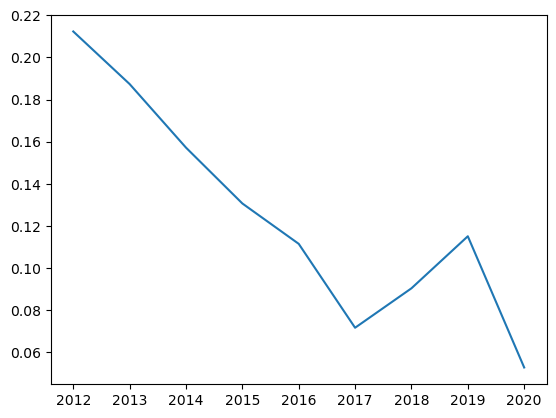

In [8]:
#연도별 상관계수 변화
corr_result = pd.DataFrame({'year' : year, 'corr' : corr})
plt.plot(corr_result['year'], corr_result['corr'])

In [9]:
#국가별 상관분석
name = []
corr = []
pval = []
for i in namelist:
    d = totaldf[totaldf['Country']== i]
    x = d['Value']
    y = d['rate_val']

    s,p = stats.pearsonr(x,y)
    if(p<0.05): #p-value < 0.05인 국가 출력
        print(i)
    name.append(i)
    corr.append(s)
    pval.append(p)
    
pd.DataFrame({'country': name, 'corr': corr, 'p': pval})

대한민국
일본
벨기에
체코
에스토니아
프랑스
독일
그리스
헝가리
룩셈부르크
노르웨이
슬로바키아
슬로베니아
스웨덴
영국
오스트레일리아
뉴질랜드


,country,corr,p
0,대한민국,-0.812277,0.007813
1,이스라엘,0.563700,0.113943
2,일본,-0.682362,0.042854
3,튀르키예,-0.339033,0.372110
4,캐나다,0.531385,0.140952
5,멕시코,0.323134,0.396339
6,미국,0.489086,0.181499
7,칠레,0.130405,0.738078
8,콜롬비아,0.641500,0.062567
9,코스타리카,0.309079,0.418345


/Users/kangsarang/opt/anaconda3/envs/SDAWeek1/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


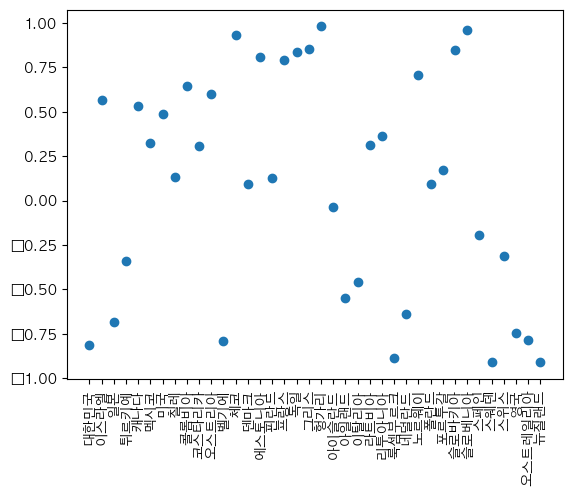

In [10]:
#국가별 상관계수 변화

rc('font', family = 'AppleGothic')

plt.xticks(rotation=90)
corr_result = pd.DataFrame({'country' : namelist, 'corr' : corr})
plt.scatter(corr_result['country'], corr_result['corr'])



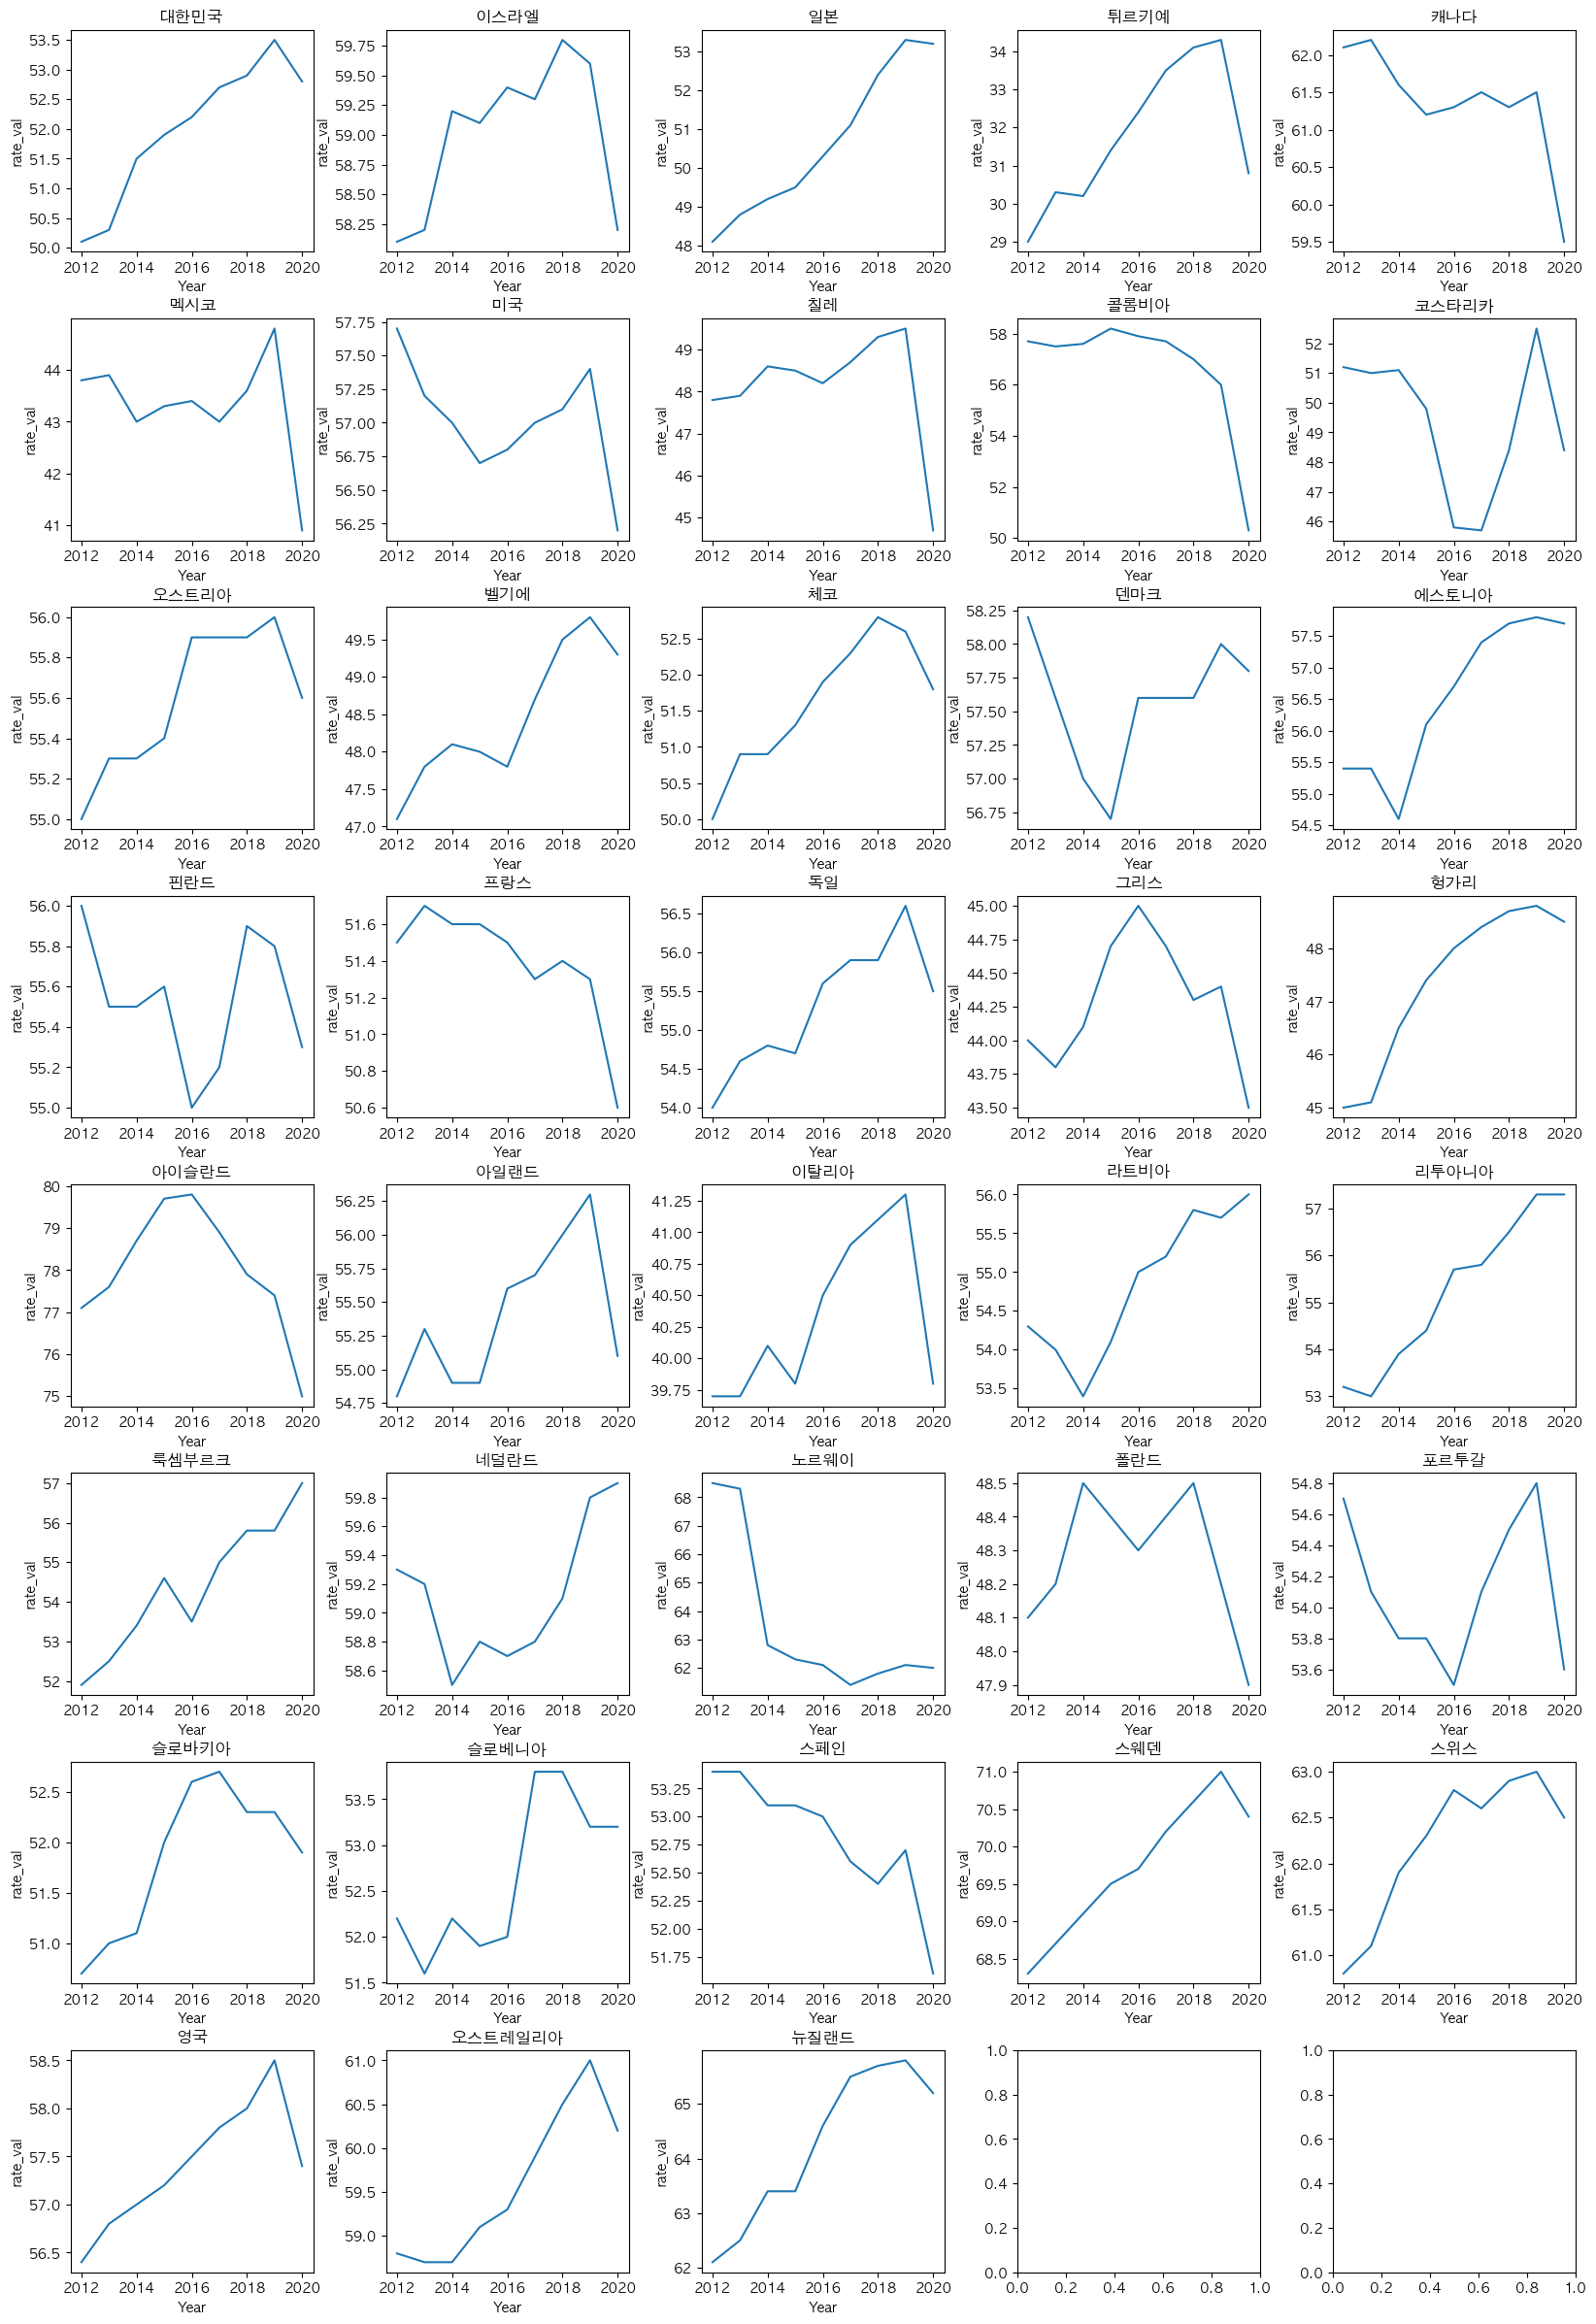

In [12]:
#데이터 시각화


rc('font', family = 'AppleGothic')

fig, ax = plt.subplots(ncols = 5, nrows = 8)
fig.set_size_inches((20,30))
fig.subplots_adjust(wspace = 0.3, hspace = 0.3)

try:
    i = 0
    for x in range(8):
        for y in range(5):
            d = rate_df[rate_df['Country'] == namelist[i]]
            sns.lineplot(x = 'Year', y = 'rate_val', data = d, ax = ax[x,y])
            ax[x,y].set_title(namelist[i])
            i = i+1
except:
    print()



<AxesSubplot:xlabel='Country', ylabel='rate_val'>

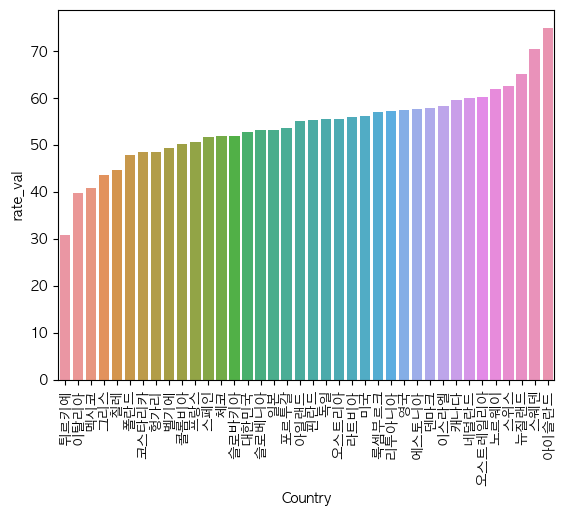

In [13]:
z = rate_df[rate_df['Year'] == 2020]
z = z.sort_values('rate_val')
plt.xticks(rotation=90)
sns.barplot(x = 'Country', y = 'rate_val',data = z)

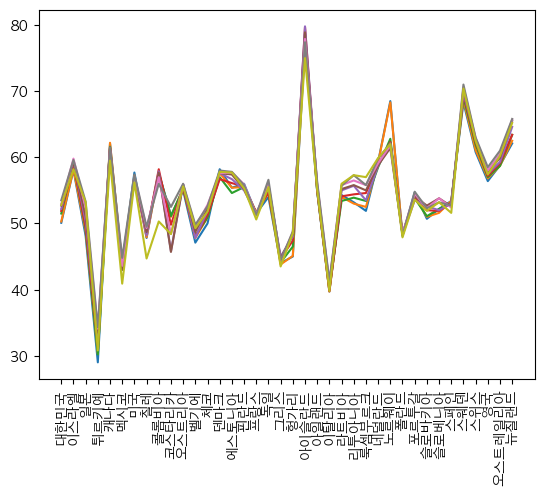

In [14]:
for i in range(2012, 2021):
    plt.plot(rate_df[rate_df['Year'] == i]['Country'], rate_df[rate_df['Year'] == i]['rate_val'])

plt.xticks(rotation = 90)
plt.show()